In [3]:
pip install tensorflow


In [6]:
from google.colab import files
uploaded = files.upload()


Saving Polkadot_cleaned.csv to Polkadot_cleaned.csv


In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Polkadot_cleaned.csv")

# Check for missing values
missing_summary = df.isnull().sum()
total_missing = missing_summary.sum()

print("Missing values per column:\n", missing_summary)
print("\nTotal missing values:", total_missing)


Missing values per column:
 Timestamp         0
Open              0
High              0
Low               0
Close             0
VWAP              0
Volume            0
Count             0
Crypto            0
Volatility        0
Price_Change      0
RSI               0
MA_7              0
MA_14             0
Close_Lag_1       0
Close_Lag_2       0
Close_Lag_3       0
Rolling_Std_7     0
Rolling_Std_14    0
EMA_7             0
EMA_14            0
MACD              0
Day_of_Week       0
Month             0
Week_of_Year      0
dtype: int64

Total missing values: 0


             Open    High     Low   Close    VWAP       Volume  Count  \
Timestamp                                                               
NaT        5.8426  5.9337  5.5001  5.6001  5.6704  455017.9756   4748   
NaT        5.6010  5.7997  5.2320  5.3847  5.5327  500128.8536   6173   
NaT        5.3835  5.6032  5.1526  5.5577  5.4046  447693.2262   3755   
NaT        5.5772  5.7324  5.2764  5.5072  5.4382  604834.4351   4805   
NaT        5.5057  5.9388  5.4134  5.9388  5.6169  429134.9228   4662   

             Crypto  Volatility  Price_Change  ...  Close_Lag_2  Close_Lag_3  \
Timestamp                                      ...                             
NaT        Polkadot      0.4336       -0.2409  ...       5.9196       5.9866   
NaT        Polkadot      0.5677       -0.2154  ...       5.8410       5.9196   
NaT        Polkadot      0.4506        0.1730  ...       5.6001       5.8410   
NaT        Polkadot      0.4560       -0.0505  ...       5.3847       5.6001   
NaT     

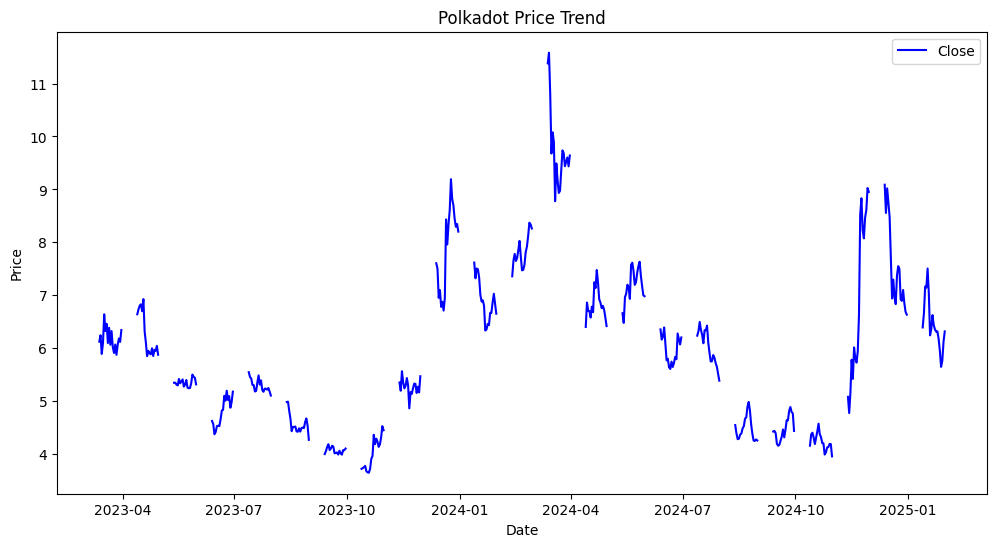

In [8]:
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/Polkadot_cleaned.csv"
df = pd.read_csv(file_path)
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%d/%m/%Y", errors="coerce")
df.set_index("Timestamp", inplace=True)

print(df.head())

# Plot a line graph (assuming 'Price' column exists)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close', color='blue')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Polkadot Price Trend')
plt.legend()
plt.show()


<ipython-input-9-143c9decb9c2>:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], infer_datetime_format=True, errors='coerce')


Missing values before filling:
Timestamp         427
Open                0
High                0
Low                 0
Close               0
VWAP                0
Volume              0
Count               0
Crypto              0
Volatility          0
Price_Change        0
RSI                 0
MA_7                0
MA_14               0
Close_Lag_1         0
Close_Lag_2         0
Close_Lag_3         0
Rolling_Std_7       0
Rolling_Std_14      0
EMA_7               0
EMA_14              0
MACD                0
Day_of_Week         0
Month               0
Week_of_Year        0
dtype: int64
Filling missing values...
Missing values after filling:
Timestamp         427
Open                0
High                0
Low                 0
Close               0
VWAP                0
Volume              0
Count               0
Crypto              0
Volatility          0
Price_Change        0
RSI                 0
MA_7                0
MA_14               0
Close_Lag_1         0
Close_Lag_2         

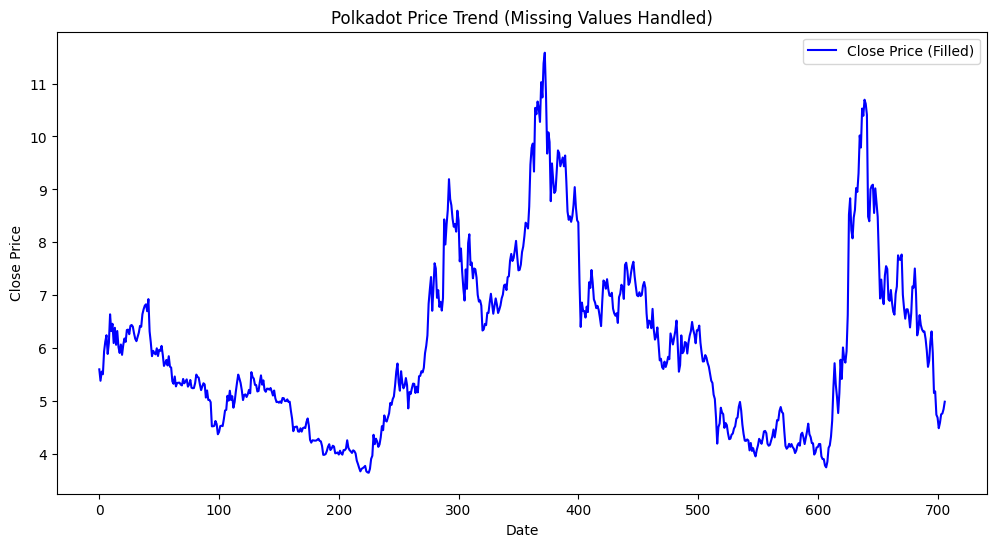

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Polkadot_cleaned.csv")

# Convert Date column to datetime format (fixing format issue)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], infer_datetime_format=True, errors='coerce')

# Check for missing values before handling
print("Missing values before filling:")
print(df.isnull().sum())

# Only apply missing value handling if there are NaNs
if df.isnull().values.any():
    print("Filling missing values...")

    # Step 1: Forward Fill
    df['Close'] = df['Close'].ffill()

    # Step 2: Backward Fill
    df['Close'] = df['Close'].bfill()

    # Step 3: Linear Interpolation
    df['Close'] = df['Close'].interpolate(method='linear')

    # Step 4: Polynomial Interpolation (Convert index to numerical values first)
    df['Close'] = df['Close'].interpolate(method='polynomial', order=2)

# Check for missing values after handling
print("Missing values after filling:")
print(df.isnull().sum())

# Plot the data to visualize changes
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price (Filled)', color='blue')

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Polkadot Price Trend (Missing Values Handled)")
plt.legend()
plt.show()


In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Select Close price
target_col = "Close"
data = df[[target_col]].copy()

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(data_scaled, seq_length)

In [11]:
# Split into train and test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0682 - val_loss: 0.0198
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0084 - val_loss: 0.0153
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0063 - val_loss: 0.0122
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0063 - val_loss: 0.0106
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0046 - val_loss: 0.0093
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0037 - val_loss: 0.0084
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0040 - val_loss: 0.0079
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0034 - val_loss: 0.0084
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0036 - val_loss: 0.0083
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0034 - val_loss: 0.0066
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0036 - val_loss: 0.0071
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0

In [14]:
# Predict on test set
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


In [15]:
# Rescale back to original values
y_test_actual = scaler.inverse_transform(y_test)
y_pred_actual = scaler.inverse_transform(y_pred)

In [23]:
# Calculate R² score
r2 = r2_score(y_test_actual, y_pred_actual)
print("R² Score:", r2)

R² Score: 0.931914239183569


In [17]:
# Forecast future values
future_steps = 30
future_inputs = X_test[-1].reshape(1, seq_length, 1)

future_predictions = []
for _ in range(future_steps):
    pred = model.predict(future_inputs)
    future_predictions.append(pred[0, 0])
    future_inputs = np.roll(future_inputs, -1, axis=1)
    future_inputs[0, -1, 0] = pred[0, 0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━

In [18]:
# Rescale future predictions
future_predictions_actual = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

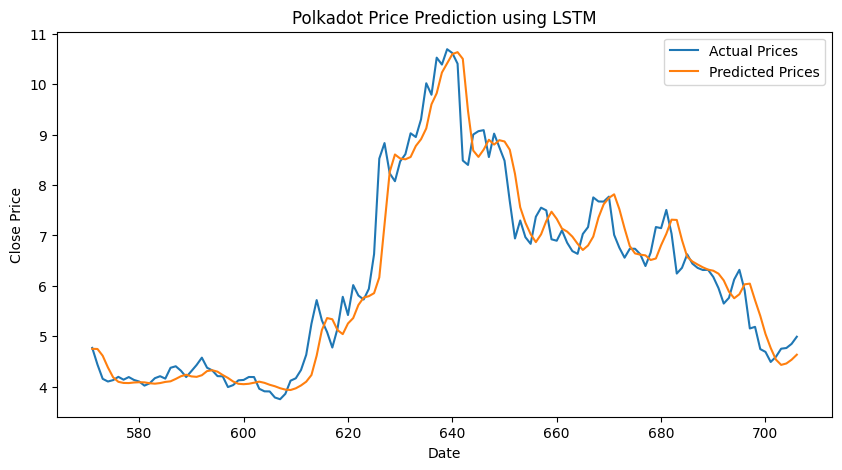

In [19]:
# Plot results
plt.figure(figsize=(10, 5))
plt.plot(df.index[-len(y_test_actual):], y_test_actual, label="Actual Prices")
plt.plot(df.index[-len(y_test_actual):], y_pred_actual, label="Predicted Prices")
plt.title("Polkadot Price Prediction using LSTM")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

R² Score: 0.9319
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/

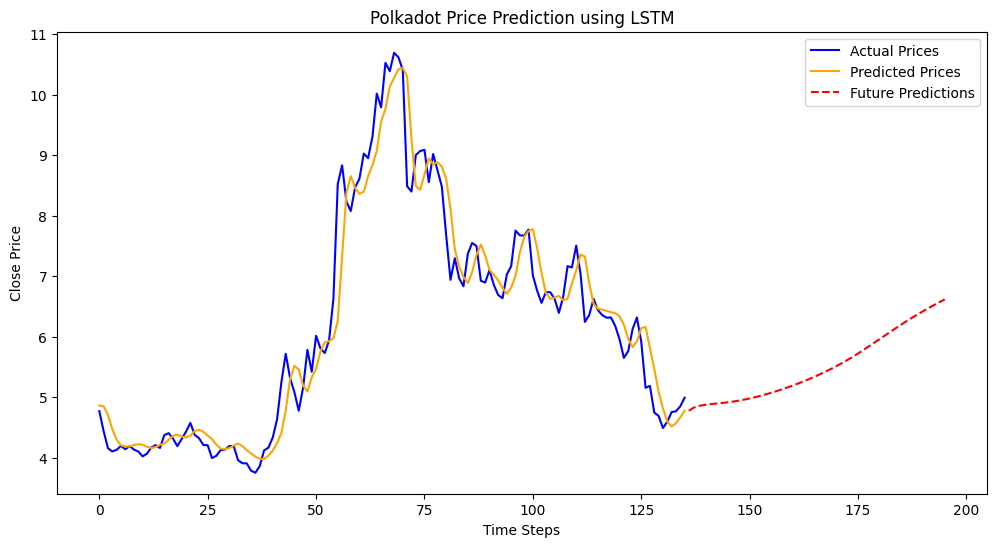

In [22]:

# Compute R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# Rescale predictions back to original scale
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

# Forecast future values
future_steps = 60  # Predicting 60 days into the future
future_inputs = X_test[-1].reshape(1, seq_length, 1)

future_predictions = []
for _ in range(future_steps):
    pred = model.predict(future_inputs)
    future_predictions.append(pred[0, 0])
    future_inputs = np.roll(future_inputs, -1, axis=1)
    future_inputs[0, -1, 0] = pred[0, 0]

# Rescale future predictions
future_predictions_actual = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create an x-axis based on numerical values instead of dates
x_actual = np.arange(len(y_test_actual))  # X-axis for actual data
x_future = np.arange(len(y_test_actual), len(y_test_actual) + future_steps)  # X-axis for future predictions

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(x_actual, y_test_actual, label="Actual Prices", color='blue')
plt.plot(x_actual, y_pred_actual, label="Predicted Prices", color='orange')
plt.plot(x_future, future_predictions_actual, label="Future Predictions", linestyle='--', color='red')

plt.title("Polkadot Price Prediction using LSTM")
plt.xlabel("Time Steps")
plt.ylabel("Close Price")
plt.legend()
plt.show()